In [1]:
import random
import functions
test_size = 80
test_list = random.sample(range(0, 500), test_size)
test_list.sort()

In [2]:
import csv

train_matrix = []
test_matrix = []
train_label = []
test_label = []

with open('dataset/Admission_Predict_data/Admission_Predict_Ver1.1.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader) # title
    index_test_list = 0
    index_row_list = 0
    for row in reader:
        train_row = []
        for i in range(1, len(row) - 1):
            train_row.append(float(row[i]))
        test_row = float(row[-1])
        
        if index_test_list < test_size and test_list[index_test_list] == index_row_list:
            test_matrix.append(train_row)
            test_label.append(test_row)
            index_test_list += 1
        else:
            train_matrix.append(train_row)
            train_label.append(test_row)
        index_row_list += 1
        

## Linear Regression Model

In [3]:
import numpy as np
x = np.array(train_matrix)
y = np.array(train_label)
x_test = np.array(test_matrix)

In [4]:
from sklearn.model_selection import KFold

def cross_val(data, label, model):
    kfold = KFold(n_splits = 5, shuffle = False)
    index = kfold.split(X = data, y = label)
    cross_val_error = []
    for train_index, test_index in index:
        model.fit(data[train_index], label[train_index]) # train
        y_pred = model.predict(data[test_index]) # predict
        error = functions.RSS(y_pred, label[test_index]) # error
        cross_val_error.append(error)
    exp_error = sum(cross_val_error)/len(cross_val_error)
    return exp_error

### no kernel SVM

In [5]:
from sklearn import svm
clf = svm.SVR(gamma = 'auto')
print('min error without kernel:', cross_val(x, y, clf))

min error without kernel: 0.8081134428001473


### rbf kernel

In [6]:
gamma = np.linspace(0.000001, 0.00001, 100)
error = []
for i in gamma:
    clf = svm.SVR(kernel = 'rbf', C = 1e4, gamma = float(i))
    error.append(cross_val(x, y, clf))
print('min error with rbf kernel:', min(error))

min error with rbf kernel: 0.4380379385090453


min error: 0.4380379385090453
gamma when at min error: 2.0000000000000003e-06


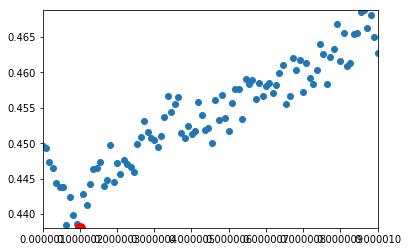

In [8]:
import matplotlib.pyplot as plt
import math
print('min error:', min(error))
print('gamma when at min error:', gamma[error.index(min(error))])
plt.scatter(gamma, error)
plt.xlim((0.000001, 0.00001))
plt.ylim((min(error), max(error)))
plt.scatter(gamma[error.index(min(error))], min(error), c = 'r', s = 100)
plt.show()

### linear kernel

In [9]:
C = [1e0, 1e1, 1e2, 1e3]
error = []
for i in C:
    clf = svm.SVR(kernel = 'linear', C = i)
    error.append(cross_val(x, y, clf))
print('C:', C)
print('error:', error)
print('min error with linear kernel:', min(error))

C: [1.0, 10.0, 100.0, 1000.0]
error: [0.40328693312330033, 5.219973412051237, 657.4768352142801, 78806.67158575346]
min error with linear kernel: 0.40328693312330033


### poly kernel

In [10]:
degree = np.linspace(0, 12, 13)
error = []
for i in degree:
    clf = svm.SVR(kernel = 'poly', C = 1e6, degree = i, gamma = 0.000001)
    error.append(cross_val(x, y, clf))
print('min error with poly kernel:', min(error))

min error with poly kernel: 0.3981119847620853


min error: 0.3981119847620853
gamma when at min error: 1.0


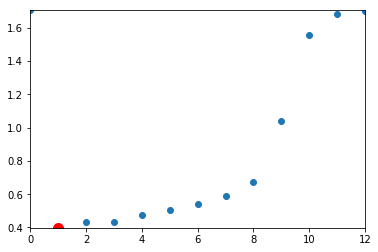

In [11]:
print('min error:', min(error))
print('gamma when at min error:', degree[error.index(min(error))])
plt.scatter(degree, error)
plt.xlim((0, 12))
plt.ylim((min(error), max(error)))
plt.scatter(degree[error.index(min(error))], min(error), c = 'r', s = 100)
plt.show()